In [1]:
from tr_functions.general import GeneralModel
from tr_functions.gaussian import GaussianModel

In [2]:
split_data_tp1_app = GeneralModel.open_file('data/data_tp1_app.txt')
split_data_tp1_dec = GeneralModel.open_file('data/data_tp1_dec.txt')

split_data_tp2_app = GeneralModel.open_file('data/data_tp2_app.txt')
split_data_tp2_dec = GeneralModel.open_file('data/data_tp2_dec.txt')

split_data_tp3_app = GeneralModel.open_file('data/data_tp3_app.txt')
split_data_tp3_dec = GeneralModel.open_file('data/data_tp3_dec.txt')

Gaussian model created
Classes centers created
Class = 1 has a center = [-6.10093065, 5.99640958]
Class = 2 has a center = [5.79953605, 6.171171379999997]
Class = 3 has a center = [5.776998600000001, -5.925827230000001]
Class = 4 has a center = [-5.924998090000001, -6.013923480000001]
Class = 5 has a center = [-0.013581480000000043, 0.2513897700000001]


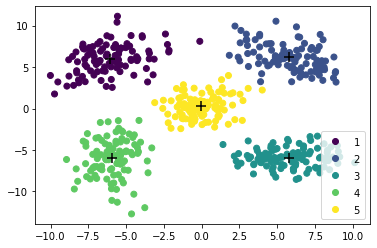

Results :
----------------
Number of elements for the learning step :  500
Number of elements for the decision step :  500
----------------

Top results :
----------------
Top 1 rate :  0.992
Top 2 rate :  1.0
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  98 │   0 │   0 │   0 │   2 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   0 │ 100 │   0 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   0 │   0 │  99 │   1 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   0 │ 100 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   1 │   0 │   0 │   0 │  99 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


In [3]:
gaussian_model = GaussianModel()
gaussian_model.gaussian_fit_model(split_data_tp1_app)
gaussian_model.print_classes_centers()
gaussian_model.show_train_plot()
gaussian_model.compute_method = "mahalanobis"
gaussian_model.test_model(split_data_tp1_dec)
gaussian_model.print_model_result()
